In [1]:
import sys
import os


SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from simon_device import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'lines.linewidth':3})
sns.set_style('white')

ACT-R connection has been started.


In [2]:
# Boksem post-error slowing data
df_bokesem_post = pd.DataFrame({'interval':(1,2,3,4,5,6,7), 
                                'response_time':(457, 463, 460, 464, 473, 485, 463), 
                                'post-correct':(437, 443, 436, 443, 450, 460, 440), 
                                'post-error':(463, 464, 457, 452, 453, 457, 449)}).melt(id_vars=('interval'), var_name='pre_trial_accuracy', value_name='response_time')

/tmp/ipykernel_28989/4270179329.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_bokesem_post = pd.DataFrame({'interval':(1,2,3,4,5,6,7),


In [3]:
param_set={'valid_cue_percentage':0.8, 'n_trials':20, 'seed':'none'}
df_model, df_param= run_simulation(log='post_effect_', n_simulation=1, n_session=7, param_set=param_set)

......>>> LOAD SIMULATION DATA <<<......


In [4]:
df_model['response_time'] = df_model['response_time'] * 1000

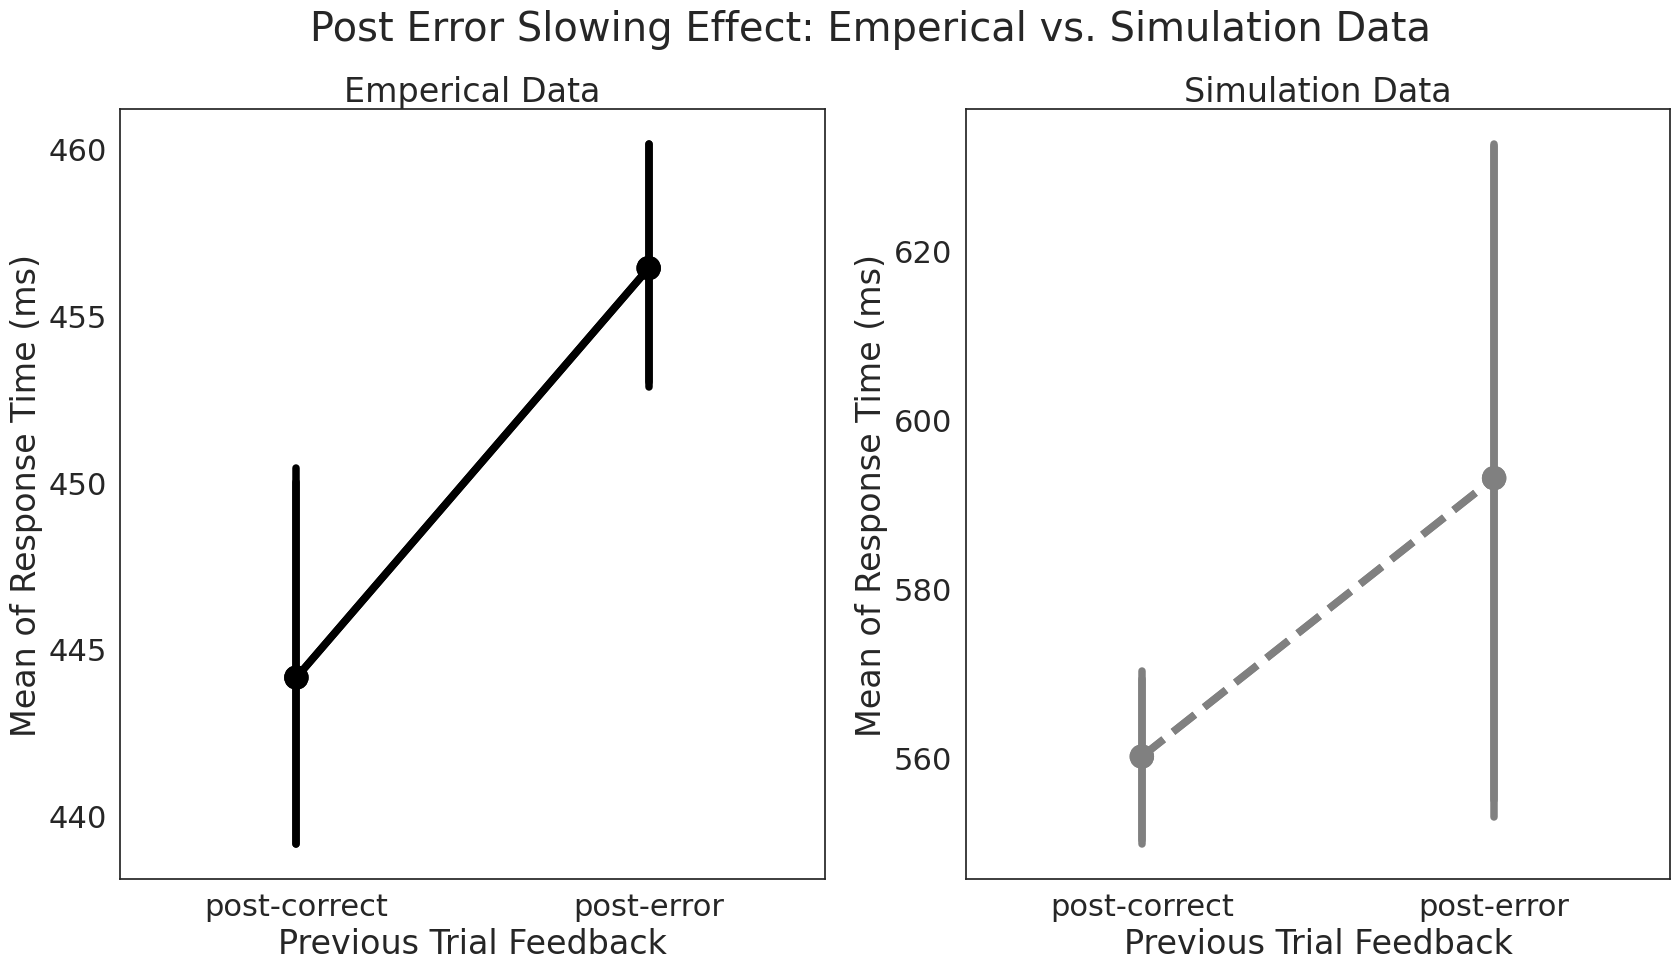

In [5]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Post Error Slowing Effect: Emperical vs. Simulation Data')
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', join=True, ax=axes[0])
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', join=True, ax=axes[0])

sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', ax=axes[1])
sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', ax=axes[1])

axes[0].set_title('Emperical Data')
axes[1].set_title('Simulation Data') 

for ax in axes:
    ax.set_xlabel('Previous Trial Feedback')
    ax.set_ylabel('Mean of Response Time (ms)')
plt.show()